In [1]:
env_name = "/Users/intuinno/codegit/SEDRo/Build/OSX/SEDRo.app"  # Name of the Unity environment binary to launch
train_mode = True 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.side_channel.engine_configuration_channel import EngineConfig, EngineConfigurationChannel

# import torch
import time
import random
import numpy as np
from collections import deque
from IPython.display import clear_output

%matplotlib inline

print("Python version:")
print(sys.version)

# check Python version
if (sys.version_info[0] < 3):
    raise Exception("ERROR: ML-Agents Toolkit (v0.3 onwards) requires Python 3")



Python version:
3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:01:53) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [5]:
engine_configuration_channel = EngineConfigurationChannel()
# env = UnityEnvironment(base_port = UnityEnvironment.DEFAULT_EDITOR_PORT, file_name=env_name, side_channels = [engine_configuration_channel])
env = UnityEnvironment(base_port = 5004, file_name=env_name, side_channels = [engine_configuration_channel])

#Reset the environment
env.reset()


# Set the default brain to work with
group_name = env.get_agent_groups()[0]
print(group_name)
group_spec = env.get_agent_group_spec(group_name)

# Set the time scale of the engine, training window size
engine_configuration_channel.set_configuration_parameters(time_scale = 1.0, width = 512, height = 512)


INFO:mlagents_envs:Connected new brain:
Baby?team=0


Baby?team=0


Number of observations :  2
[(84, 84, 3), (39,)]
Action size:  39
Agent state looks like: 
[[[[0.67058825 0.67058825 0.6666667 ]
   [0.6509804  0.6509804  0.64705884]
   [0.63529414 0.6313726  0.627451  ]
   ...
   [0.5372549  0.5254902  0.4862745 ]
   [0.5529412  0.5372549  0.49803922]
   [0.28627452 0.28235295 0.2784314 ]]

  [[0.6745098  0.6745098  0.67058825]
   [0.65882355 0.65882355 0.654902  ]
   [0.6431373  0.6392157  0.63529414]
   ...
   [0.52156866 0.5019608  0.47058824]
   [0.5254902  0.5137255  0.47058824]
   [0.2901961  0.2901961  0.28235295]]

  [[0.67058825 0.67058825 0.6666667 ]
   [0.65882355 0.654902   0.6509804 ]
   [0.6431373  0.6392157  0.63529414]
   ...
   [0.5254902  0.50980395 0.4745098 ]
   [0.5411765  0.5294118  0.4862745 ]
   [0.30588236 0.30588236 0.29411766]]

  ...

  [[0.36862746 0.32156864 0.27058825]
   [0.36862746 0.32156864 0.27058825]
   [0.36078432 0.3137255  0.2627451 ]
   ...
   [0.1764706  0.17254902 0.16862746]
   [0.18431373 0.18039216 0.1764

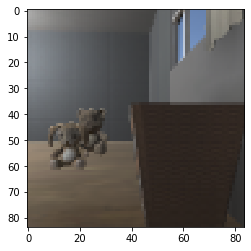

In [6]:
# Get the state of the agents
step_result = env.get_step_result(group_name)

# Examine the number of observations per Agent
print("Number of observations : ", len(group_spec.observation_shapes))
print(group_spec.observation_shapes)

state_size = group_spec.observation_shapes[0][0]

action_size = group_spec.action_size
print("Action size: ", action_size)
# Examine the state space for the first observation for all agents
print("Agent state looks like: \n{}".format(step_result.obs[0]))

# Examine the state space for the first observation for the first agent
print("Agent state looks like: \n{}".format(step_result.obs[0][0]))

# Is there a visual observation ?
vis_obs = any([len(shape) == 3 for shape in group_spec.observation_shapes])
print("Is there a visual observation ?", vis_obs)

# Examine the visual observations
if vis_obs:
    vis_obs_index = next(i for i,v in enumerate(group_spec.observation_shapes) if len(v) == 3)
    print("Agent visual observation look like:")
    obs = step_result.obs[vis_obs_index]
    plt.imshow(obs[0,:,:,:])


In [ ]:
for episode in range(10): # num of iteration
    env.reset()
    step_result = env.get_step_result(group_name)
    done = False
    episode_rewards = 0
    while not done:
        action_size = group_spec.action_size
#         print( group_spec.is_action_continuous())
        if group_spec.is_action_continuous():
            action = np.random.randn(step_result.n_agents(), group_spec.action_size)
        
            
        if group_spec.is_action_discrete():
            branch_size = group_spec.discrete_action_branches
            action = np.column_stack([np.random.randint(0, branch_size[i], size=(step_result.n_agents())) for i in range(len(branch_size))])
#         print(action)
        env.set_actions(group_name, action)
        env.step()
        step_result = env.get_step_result(group_name)

        # Examine the visual observations
        if vis_obs:
            vis_obs_index = next(i for i,v in enumerate(group_spec.observation_shapes) if len(v) == 3)
            obs = step_result.obs[vis_obs_index]
            plt.imshow(obs[0,:,:,:])
        
        
#         print(step_result)
        episode_rewards += step_result.reward[0]
        done = step_result.done[0]
#         break
#     print("Total reward this episode: {}".format(episode_rewards))
#     break


In [ ]:
env.close()